In [3]:
import time
import json
import pprint as pp

from IPython.display import display, Markdown, Latex
#display(Markdown('*some markdown* $\phi$'))

import pandas as pd
from IPython.display import display, HTML

from shapely.geometry import box
import shapely.geometry

from gbdxtools import Interface
gbdx = Interface()

from gbdxtools.task import env
from gbdxtools import CatalogImage, WV03_VNIR, WV03_SWIR  

%matplotlib inline

In [5]:
wkt_string="POLYGON ((153.12975883483887 -28.13111173310014, 153.24236869812012 -28.13111173310014, 153.24236869812012 -28.053424036910094, 153.12975883483887 -28.053424036910094, 153.12975883483887 -28.13111173310014))"
#wkt_string="MULTIPOINT((150.2514 -35.6716, 150.1901 -35.8153, 150.1024 -35.8516, 150.3483 -35.4806, 150.3568 -35.5109, 150.3678 -35.5426, 150.2766 -35.6692, 150.2566 -35.6996, 150.1909 -35.7705, 150.2998 -35.442, 150.278 -35.6582, 150.2716 -35.6856))"

types = [ "DigitalGlobeAcquisition" ]

cresults = gbdx.catalog.search(searchAreaWkt=wkt_string,
                          startDate="2011-08-16T00:00:00.000Z",
                          endDate="2013-08-16T00:00:00.000Z",
                          types=types)

len(cresults)

42

In [14]:
from shapely.geometry import MultiPoint
points = MultiPoint([(0.0, 0.0), (1.0, 1.0)])

mp = MultiPoint([(150.2514,-35.6716),
(150.1901,-35.8153),
(150.1024,-35.8516),
(150.3483,-35.4806),
(150.3568,-35.5109),
(150.3678,-35.5426),
(150.2766,-35.6692),
(150.2566,-35.6996),
(150.1909,-35.7705),
(150.2998,-35.442),
(150.278,-35.6582),
(150.2716,-35.6856)])


In [16]:
mp.bounds

(150.1024, -35.8516, 150.3678, -35.442)

In [17]:
blooms = pd.read_csv("blooms.csv")
display(blooms)

,date,long,lat
0,19/06/2012,150.2514,-35.6716
1,19/06/2012,150.1901,-35.8153
2,19/06/2012,150.1024,-35.8516
3,15/07/2012,150.3483,-35.4806
4,15/07/2012,150.3568,-35.5109
5,15/07/2012,150.3678,-35.5426
6,15/07/2012,150.2766,-35.6692
7,15/07/2012,150.2566,-35.6996
8,15/07/2012,150.1909,-35.7705
9,14/08/2012,150.2998,-35.4420


In [22]:
# a convex hull of the blooms:
#wkt_string="POLYGON ((150.1024 -35.8516, 150.1024 -35.8516, 150.1024 -35.442, 150.3678 -35.442, 150.3678 -35.8516))"


wkt_string="POLYGON((150.1024 -35.8516,150.1024 -35.8516,150.1024 -35.442,150.3678 -35.442,150.36556264648436 -35.84991010339879,150.1024 -35.8516))"

#wkt_string="POLYGON((150.1024 -35.8516,150.08317392578124 -35.85159999999998,150.08454721679686 -35.64650451494842,150.08454721679686 -35.42969199272399,150.26668569335936 -35.429132493145225,150.4501974609375 -35.43081098022049,150.45139333496093 -35.85213632508195,150.1024 -35.8516))""

types = [ "DigitalGlobeAcquisition" ]

cresults = gbdx.catalog.search(searchAreaWkt=wkt_string,
                          startDate="2012-06-19T00:00:00.000Z",
                          endDate="2012-08-14T00:00:00.000Z",
                          types=types)

len(cresults)

0

In [19]:
cresults

[{'identifier': '103001001E954800',
  'properties': {'browseURL': 'https://api.discover.digitalglobe.com/show?id=103001001E954800&f=jpeg',
   'catalogID': '103001001E954800',
   'cloudCover': 0,
   'footprintWkt': 'MULTIPOLYGON(((150.0747938 -34.97295122, 150.2963469 -34.9702646, 150.2971654 -35.0166037, 150.2975103 -35.06295166, 150.2975101 -35.10929392, 150.2977636 -35.1555872, 150.2976386 -35.20190729, 150.2975707 -35.24822826, 150.2961529 -35.29467604, 150.2959511 -35.34100405, 150.2950858 -35.38739367, 150.2954898 -35.43363186, 150.2955082 -35.4798974, 150.2952801 -35.52619521, 150.2953664 -35.57245217, 150.2955848 -35.61869369, 150.2952853 -35.66499649, 150.2953697 -35.71123636, 150.2955201 -35.75746428, 150.2956886 -35.80369037, 150.2958845 -35.8499081, 150.2961097 -35.89610971, 150.2963398 -35.94231128, 150.2965775 -35.98851608, 150.2968364 -36.03473049, 150.2968486 -36.03699995, 150.0762007 -36.04459351, 150.076198 -36.04243717, 150.0762649 -35.99594898, 150.0758546 -35.949554

In [36]:

wkt_string="POLYGON((150.1024 -35.8516,150.1024 -35.8516,150.1024 -35.442,150.3678 -35.442,150.36556264648436 -35.84991010339879,150.1024 -35.8516))"

#wkt_string="POLYGON((150.1024 -35.8516,150.08317392578124 -35.85159999999998,150.08454721679686 -35.64650451494842,150.08454721679686 -35.42969199272399,150.26668569335936 -35.429132493145225,150.4501974609375 -35.43081098022049,150.45139333496093 -35.85213632508195,150.1024 -35.8516))""

types = [ "DigitalGlobeAcquisition" ]

cresults = gbdx.catalog.search(searchAreaWkt=wkt_string,
                          startDate="2016-08-20T00:00:00.000Z",
                          endDate="2018-08-20T00:00:00.000Z",
                          types=types)

len(cresults)

102

In [37]:
v =pd.io.json.json_normalize(cresults)

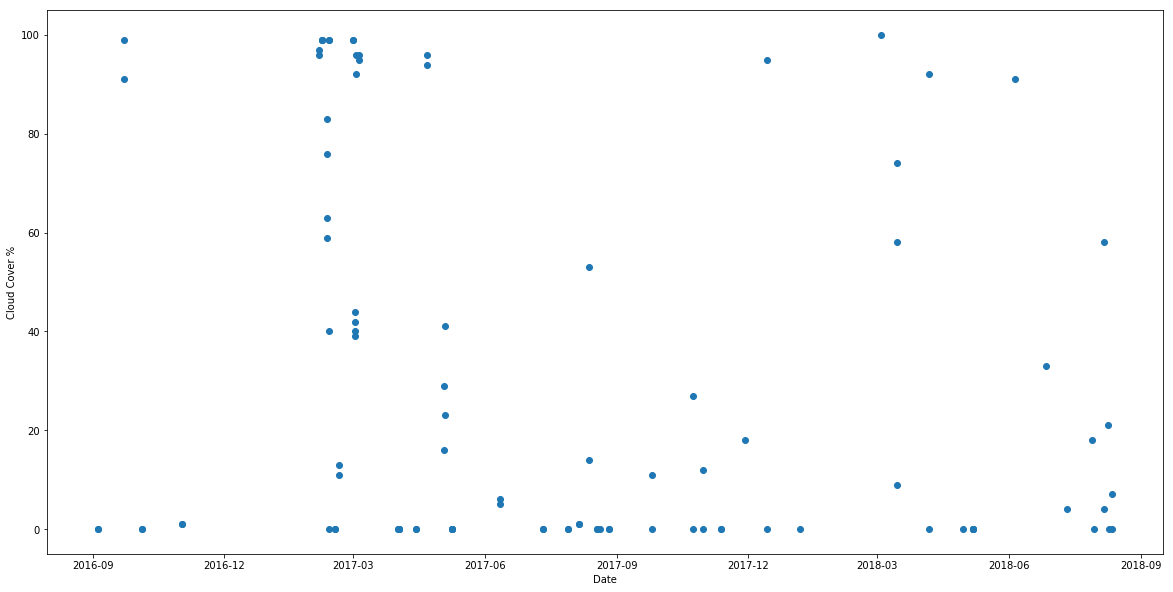

In [38]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
#plt.plot(x=v[['properties.timestamp']],y=v[['properties.cloudCover']])
#v[['properties.timestamp']]
#plt.plot_date(x=days, y=impressions)
cc = v[['properties.cloudCover']]
ts = v[['properties.timestamp']]

plt.figure(figsize=(20, 10))
plt.plot_date(x=ts,y=cc)
plt.xlabel("Date")
plt.ylabel("Cloud Cover %")

In [24]:
# ordering VNIR
# 104001003C24AF00 2018-05-07 https://api.discover.digitalglobe.com/show?id=104001003C24AF00
# 104001001D14E600 2016-06-22 https://api.discover.digitalglobe.com/show?id=104001001D14E600
cat_ids = ['104001003C24AF00', '104001001D14E600']
order_id = gbdx.ordering.order(cat_ids)
print(order_id)

370d95be-6914-4941-8839-446a91efc48d


In [27]:
order_status = gbdx.ordering.status('370d95be-6914-4941-8839-446a91efc48d')
pp.pprint(order_status)

[{'acquisition_id': '104001001D14E600',
  'location': 's3://receiving-dgcs-tdgplatform-com/058344025010_01_003',
  'state': 'delivered'},
 {'acquisition_id': '104001003C24AF00',
  'location': 's3://receiving-dgcs-tdgplatform-com/058344026010_01_003',
  'state': 'delivered'}]


In [28]:
CatalogImage('104001003C24AF00').bounds

(150.15206888, -35.84786418900827, 150.30434367338844, -35.6561486931405)

In [29]:
CatalogImage('104001001D14E600').bounds

(150.10016943, -35.98236684970535, 150.25126815439813, -35.63326031)

In [31]:
a = box(150.15206888, -35.84786418900827, 150.30434367338844, -35.6561486931405)
b = box(150.10016943, -35.98236684970535, 150.25126815439813, -35.63326031)
# The intersection
print(a.intersection(b).bounds)

(150.15206888, -35.84786418900827, 150.25126815439813, -35.6561486931405)


In [33]:
bb = [150.15206888, -35.84786418900827, 150.25126815439813, -35.6561486931405]
bay2018 = CatalogImage('104001003C24AF00', bbox=bb) # 2018-5-7
bay2016 = CatalogImage('104001001D14E600', bbox=bb) # 2016-06-22

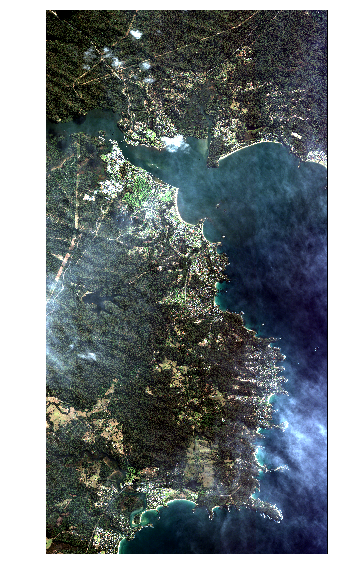

In [34]:
bay2016.plot()

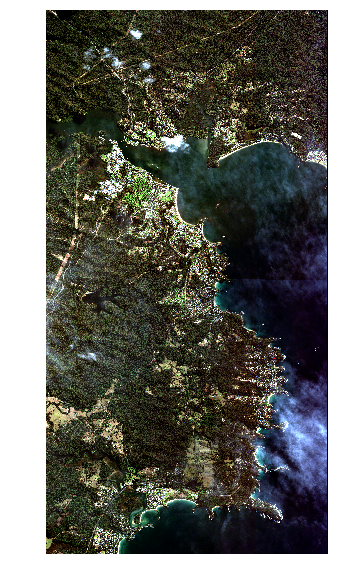

In [35]:
bay2016_acomp = CatalogImage('104001001D14E600', bbox=bb, acomp=True)
bay2016_acomp.plot()

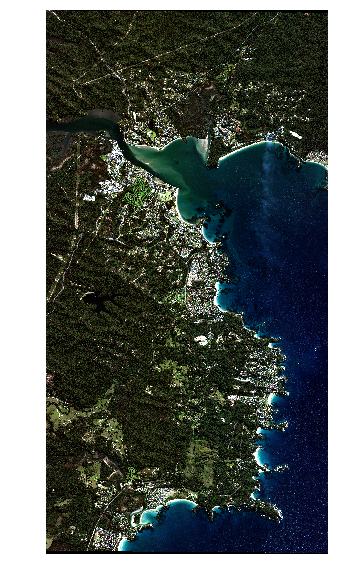

In [39]:
bay2018_acomp = CatalogImage('104001003C24AF00', bbox=bb, acomp=True)
bay2018_acomp.plot()